In [95]:
from picaso import justdoit as jdi 
from picaso import justplotit as jpi

jpi.output_notebook()


from myastrotools.tools import SloangFilter,SloaniFilter,SloanrFilter,SloanzFilter, NIRC2HFilter, NIRC2JFilter

filters = [SloangFilter(),SloanrFilter(),SloaniFilter(),SloanzFilter(),NIRC2JFilter(),NIRC2HFilter()]
for f in filters:
    print(f.central_wavelength, f.wavelength_unit)

Loading BokehJS ...

4782.325 Angstrom
6260.406 Angstrom
7732.03 Angstrom
966.592 nm
1.246 um
1.621 um


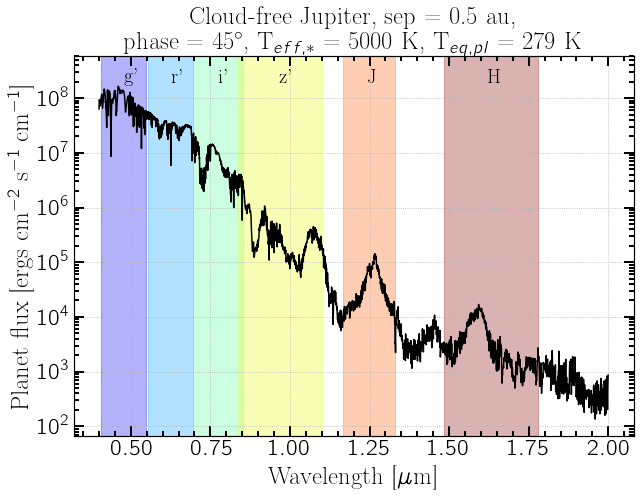

In [2]:
directory = '/Volumes/Oy/Reflectx/ReflectXGasGiantModelGrid/'
directory += 'ReflectXGasGiantModelGrid-Jupiter-Tstar5000-Rstar0.8-Teq279-sep0.5-rad1.0-mass1.0-mh3-co1.5-phase45'
spec = pd.read_csv(directory+'/cloud-free-spectrum-R2000.csv', delim_whitespace=True)
wavelength = spec['wavelength [um]']
flux = spec['planet flux [ergs/cm2/s/cm]']

def PlotFiltersAndSpectrum(wavelength, flux, annotate_y = 2e8, top = 6e8, label = '',
                          title = 'Cloud-free Jupiter, sep = 0.5 au, \n phase = 45$^{\circ}$, T$_{eff,*}$ = 5000 K, T$_{eq,pl}$ = 279 K'):
    %matplotlib inline
    fig = plt.figure(figsize=(9,7))
    plt.plot(wavelength, flux, color='black', 
             label=label)

    import matplotlib
    cmap = matplotlib.cm.get_cmap('Paired')
    cmap = matplotlib.cm.get_cmap('jet')

    n = len(filters)
    cs = np.linspace(0.1,0.99,n)
    colors = cmap(cs)
    alpha = 0.3
    breakpoint = 4
    filter_labels=["g'","r'","i'","z'",'J','H']
    for i,f in enumerate(filters[:breakpoint-1]):
        plt.axvspan(f.half_max_low*u.AA.to(u.um), f.half_max_high*u.AA.to(u.um), alpha = alpha,
                   color=colors[i])
        plt.annotate(filter_labels[i], xy = (f.central_wavelength*u.AA.to(u.um),annotate_y), xytext = (0,0), 
                     textcoords='offset points',color='black', fontsize=20)
    f = filters[breakpoint-1]
    plt.axvspan(f.half_max_low*u.nm.to(u.um), f.half_max_high*u.nm.to(u.um), alpha = alpha,
               color=colors[breakpoint-1])
    plt.annotate(filter_labels[breakpoint-1], xy = (f.central_wavelength*u.nm.to(u.um),annotate_y), xytext = (0,0), 
                 textcoords='offset points',color='black', fontsize=20)
    for i,f in enumerate(filters[breakpoint:]):
        plt.axvspan(f.half_max_low, f.half_max_high, alpha = alpha,
                   color=colors[i+breakpoint])
        plt.annotate(filter_labels[i+breakpoint], xy = (f.central_wavelength,annotate_y), xytext = (0,0), 
                     textcoords='offset points',color='black', fontsize=20)

    #plt.title(r'T$_{eq,pl}$ = 200 K, T$_{eff,*}$ = 6000 K, sep =  0.73 au')
    plt.title(title,
             fontsize=25)
    plt.minorticks_on()
    plt.tick_params(axis='both',which='major',length =10, width=2,direction='in',labelsize=23)
    plt.tick_params(axis='both',which='minor',length =5, width=2,direction='in',labelsize=23)
    plt.xlabel(r"Wavelength [$\mu$m]", fontsize=25)
    plt.ylabel(r'Planet flux [ergs cm$^{-2}$ s$^{-1}$ cm$^{-1}$]', fontsize=25)
    plt.gca().set_yscale('log')
    plt.ylim(top=top)
    plt.grid(ls=':')
    #plt.legend(fontsize=20, loc='lower left')
    plt.tight_layout()
    return fig

fig = PlotFiltersAndSpectrum(wavelength, flux, annotate_y = 2e8)
fig.savefig('example-model-spectrum.png')

## ^Model gives flux from planet's surface

Need to scale to get flux arriving at Earth:

$$F = I \Omega$$
where $F$ = flux at Earth, $I$ = model intensity, and
$$\Omega = \frac{R_p^2}{D^2}$$
where $R_p$ = planet radius and $D$ = distance

5.368016016229092e-20 3.2532908390383288e-18


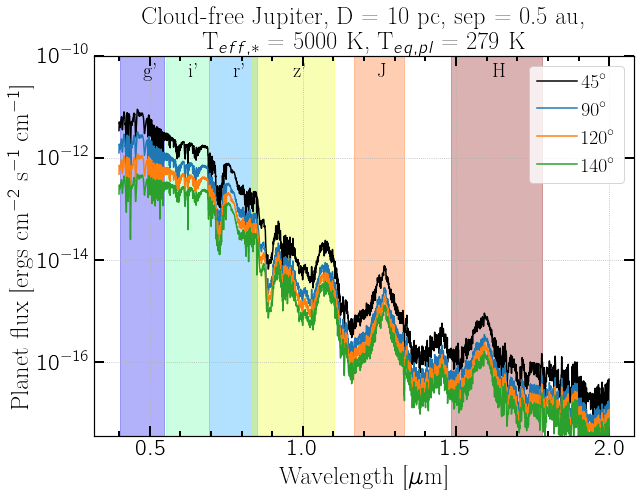

In [61]:
D = 10*u.pc
Rp = 1*u.Rjup
Omega = ((Rp/D).decompose())**2
print(Omega, ((0.8*u.Rsun/D).decompose())**2)


directory = '/Volumes/Oy/Reflectx/ReflectXGasGiantModelGrid/'
directory += 'ReflectXGasGiantModelGrid-Jupiter-Tstar5000-Rstar0.8-Teq279-sep0.5-rad1.0-mass1.0-mh3-co1.5-phase45'
spec = pd.read_csv(directory+'/cloud-free-spectrum-R2000.csv', delim_whitespace=True)
wavelength = spec['wavelength [um]']
flux = spec['planet flux [ergs/cm2/s/cm]'] * Omega

directory = '/Volumes/Oy/Reflectx/ReflectXGasGiantModelGrid/'
directory += 'ReflectXGasGiantModelGrid-Jupiter-Tstar5000-Rstar0.8-Teq279-sep0.5-rad1.0-mass1.0-mh3-co1.5-phase90'
spec2 = pd.read_csv(directory+'/cloud-free-spectrum-R2000.csv', delim_whitespace=True)

directory = '/Volumes/Oy/Reflectx/ReflectXGasGiantModelGrid/'
directory += 'ReflectXGasGiantModelGrid-Jupiter-Tstar5000-Rstar0.8-Teq279-sep0.5-rad1.0-mass1.0-mh3-co1.5-phase120'
spec3 = pd.read_csv(directory+'/cloud-free-spectrum-R2000.csv', delim_whitespace=True)

directory = '/Volumes/Oy/Reflectx/ReflectXGasGiantModelGrid/'
directory += 'ReflectXGasGiantModelGrid-Jupiter-Tstar5000-Rstar0.8-Teq279-sep0.5-rad1.0-mass1.0-mh3-co1.5-phase140'
spec4 = pd.read_csv(directory+'/cloud-free-spectrum-R2000.csv', delim_whitespace=True)

fig = PlotFiltersAndSpectrum(wavelength, flux, 
                             annotate_y = 4e-11, top = 1e-10, label = '45$^{\circ}$',
title = 'Cloud-free Jupiter, D = 10 pc, sep = 0.5 au, \n T$_{eff,*}$ = 5000 K, T$_{eq,pl}$ = 279 K')
plt.gca().plot(spec2['wavelength [um]'],spec2['planet flux [ergs/cm2/s/cm]'] * Omega,
              label = '90$^{\circ}$')
plt.gca().plot(spec3['wavelength [um]'],spec3['planet flux [ergs/cm2/s/cm]'] * Omega,
              label = '120$^{\circ}$')
plt.gca().plot(spec4['wavelength [um]'],spec4['planet flux [ergs/cm2/s/cm]'] * Omega,
              label = '140$^{\circ}$')
plt.legend(fontsize=20)

<IPython.core.display.Javascript object>


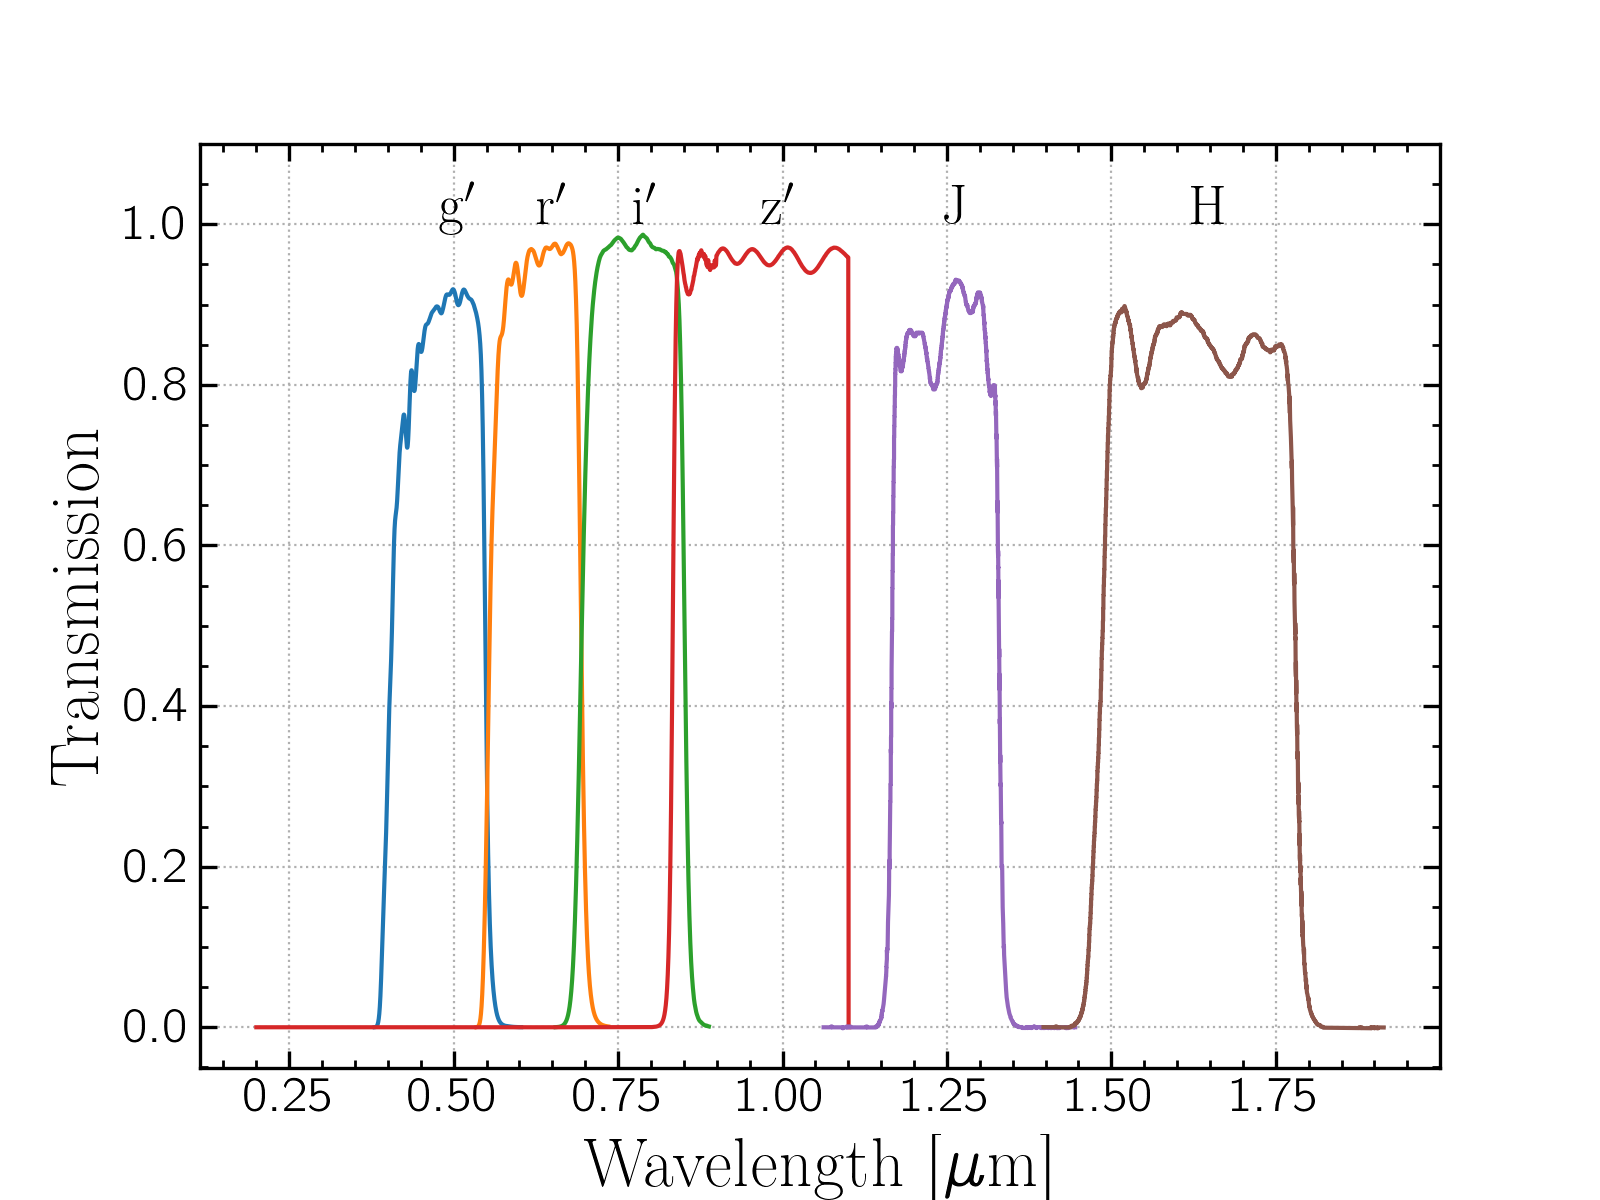

In [4]:
%matplotlib notebook
for i in range(len(filters)):
    plt.plot(filters[i].wavelength*filters[i].wavelength_unit.to(u.um),filters[i].transmission)
    plt.annotate(filters[i].label, xy=(filters[i].central_wavelength*filters[i].wavelength_unit.to(u.um),1),
                fontsize=20)
plt.grid(ls=':')
plt.ylim(top=1.1)
plt.ylabel('Transmission', fontsize=25)
plt.xlabel(r"Wavelength [$\mu$m]", fontsize=25)
plt.savefig('filter-transmission-curves.png',bbox_inches='tight')


In [5]:
directory = '/Volumes/Oy/Reflectx/ReflectXGasGiantModelGrid/'
directory += 'ReflectXGasGiantModelGrid-Jupiter-Tstar5000-Rstar0.8-Teq279-sep0.5-rad1.0-mass1.0-mh3-co1.5-phase45'
spec = pd.read_csv(directory+'/cloud-free-spectrum-R2000.csv', delim_whitespace=True)
wavelength = spec['wavelength [um]']
flux = spec['planet flux [ergs/cm2/s/cm]'] * Omega

i = 0

wavelength, filters[i].central_wavelength*filters[i].wavelength_unit.to(u.um)

(0       1.999633
 1       1.998634
 2       1.997635
 3       1.996636
 4       1.995638
           ...   
 3214    0.400903
 3215    0.400702
 3216    0.400502
 3217    0.400302
 3218    0.400102
 Name: wavelength [um], Length: 3219, dtype: float64,
 0.47823250000000006)

(2229,) (2229,)


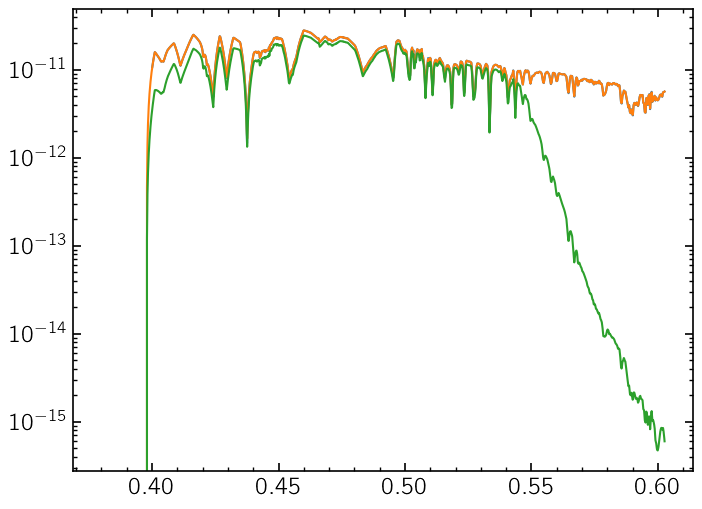

1.8304989257084456e-12

In [6]:
from scipy.interpolate import interp1d
i = 0
w = filters[i].wavelength*filters[i].wavelength_unit.to(u.um)
t = filters[i].transmission
ind = np.where((wavelength > np.min(w)) & (wavelength < np.max(w)))[0]

f = interp1d(wavelength[ind],flux[ind], fill_value="extrapolate")
flux_on_filter_wavelength_grid = f(w)
print(flux_on_filter_wavelength_grid.shape, w.shape)


filter_times_flux = flux_on_filter_wavelength_grid * t
dl = np.mean([w[i+1]-w[i] for i in range(len(w)-1)])
filttot = np.sum(filter_times_flux*dl)

%matplotlib inline
plt.plot(wavelength[ind],flux[ind])
plt.plot(w,flux_on_filter_wavelength_grid)
plt.plot(w,filter_times_flux)
plt.gca().set_yscale('log')
plt.show()

filttot

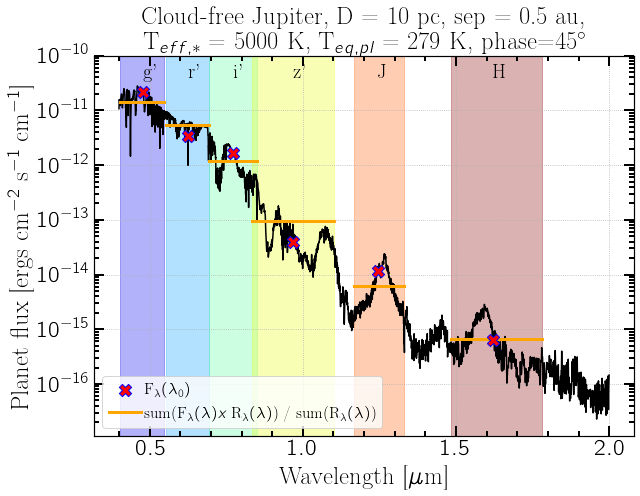

In [7]:
from scipy.interpolate import interp1d
f = interp1d(wavelength,flux)


fig = PlotFiltersAndSpectrum(wavelength, flux, 
                             annotate_y = 4e-11, top = 1e-10,
title = 'Cloud-free Jupiter, D = 10 pc, sep = 0.5 au, \n T$_{eff,*}$ = 5000 K, T$_{eq,pl}$ = 279 K, phase=45$^{\circ}$')
F0s = []
filttots = []
for i in range(len(filters)):
    F0 = f(filters[i].central_wavelength*filters[i].wavelength_unit.to(u.um))
    F0s.append(f(filters[i].central_wavelength*filters[i].wavelength_unit.to(u.um)))
    if i == 0:
        plt.gca().scatter(filters[i].central_wavelength*filters[i].wavelength_unit.to(u.um),
                     f(filters[i].central_wavelength*filters[i].wavelength_unit.to(u.um)), zorder=10,
                     color='red', s=150, marker='X', label='F$_{\lambda}(\lambda_0)$', edgecolor='blue')
    else:
        plt.gca().scatter(filters[i].central_wavelength*filters[i].wavelength_unit.to(u.um),
                         f(filters[i].central_wavelength*filters[i].wavelength_unit.to(u.um)), zorder=10,
                         color='red', s=150, marker='X', edgecolor='blue')
    
    w = filters[i].wavelength*filters[i].wavelength_unit.to(u.um)
    t = filters[i].transmission
    f3 = interp1d(w,t)
    T0 = f3(filters[i].central_wavelength*filters[i].wavelength_unit.to(u.um))
#     if i == 0:
#         plt.gca().scatter(filters[i].central_wavelength*filters[i].wavelength_unit.to(u.um),
#                          F0*T0, zorder=10,
#                          edgecolor='blue', s=150, marker='o', facecolor='None',lw=2,
#                          label='F$_{\lambda}(\lambda_0) x$ R$_{\lambda}(\lambda_0)$')
#     else:
#         plt.gca().scatter(filters[i].central_wavelength*filters[i].wavelength_unit.to(u.um),
#                          F0*T0, zorder=10,
#                          edgecolor='blue', s=150, marker='o', facecolor='None',lw=2)
                         
    
    ind = np.where((wavelength > np.min(w)) & (wavelength < np.max(w)))[0]
    f2 = interp1d(wavelength[ind],flux[ind], fill_value="extrapolate")
    flux_on_filter_wavelength_grid = f2(w)
    filter_times_flux = flux_on_filter_wavelength_grid * t
#     dl = np.mean([w[i+1]-w[i] for i in range(len(w)-1)])
#     filttot = np.sum(filter_times_flux*dl) / np.sum(t*dl)
    filttot = np.sum(filter_times_flux) / np.sum(t)
    filttots.append(filttot)
    if i == 0:
        plt.gca().plot([filters[i].half_max_low*filters[i].wavelength_unit.to(u.um),
                        filters[i].half_max_high*filters[i].wavelength_unit.to(u.um)],
                      [filttot,filttot], color='orange',lw=3,
                      label=" sum(F$_{\lambda}(\lambda) x$ R$_{\lambda}(\lambda)$) / sum(R$_{\lambda}(\lambda)$)")
    else:
        plt.gca().plot([filters[i].half_max_low*filters[i].wavelength_unit.to(u.um),
                        filters[i].half_max_high*filters[i].wavelength_unit.to(u.um)],
                      [filttot,filttot], color='orange',lw=3)

plt.legend(loc='lower left',fontsize=16)
plt.savefig('different-filter-fluxes.png',bbox_inches='tight')

In [8]:
def GetFofLambdaNaught(wavelength,flux,filt):
    from scipy.interpolate import interp1d
    f = interp1d(wavelength,flux)
    F0 = f(filt.central_wavelength*filt.wavelength_unit.to(u.um))

In [9]:
i = 0
eff_wavelength = np.round(np.sum(filters[i].transmission) / np.sum(filters[i].transmission * (1/filters[i].wavelength**2)), 
                          decimals = 3)
np.sqrt(eff_wavelength), filters[i].central_wavelength




(4724.607326434653, 4782.325)

## Doing this with pysynphot

In [93]:
import pysynphot as S

D = 10*u.pc.to(u.m)
Rp = 1*u.Rjup.to(u.m)
Omega = ((Rp/D))**2

# read in model spectrum:
directory = '/Volumes/Oy/Reflectx/ReflectXGasGiantModelGrid/'
directory += 'ReflectXGasGiantModelGrid-Jupiter-Tstar5000-Rstar0.8-Teq279-sep0.5-rad1.0-mass1.0-mh3-co1.5-phase45'
spec = pd.read_csv(directory+'/cloud-free-spectrum-R2000.csv', delim_whitespace=True)
wavelength = spec['wavelength [um]']
flux = spec['planet flux [ergs/cm2/s/cm]'] * Omega


sp = S.ArraySpectrum(wavelength, flux*(1/u.cm).to(1/u.AA), name='MySource', 
                         waveunits='Micron', fluxunits='flam')
filt = filters[2]
bp = S.ArrayBandpass(filt.wavelength, filt.transmission, name='MyBandpass', waveunits='angstrom')
obs = S.Observation(sp,bp)

KeyError: -1

# Convert spectrum to photons/sec and sum(FxR) for each filter to get total photons per sec arriving at detector

Energy per photon per wavelength:
$$E[ergs] = \frac{hc}{\lambda[cm]}$$
Number of photons per wavelength:
$$n_{\gamma}[\frac{\gamma}{cm\,s\,cm^2}] = \frac{F_{\lambda}(\lambda)[\frac{ergs}{cm\,s\,cm^2}]}{E[ergs]}$$

Alternately:
$$hc/e = 1.2398\times10^{-6} eVm$$
So $$ E_{\gamma,\lambda}(eV) = \frac{1.2398}{\lambda[\mu m]}$$

In [10]:
# read in model spectrum:
directory = '/Volumes/Oy/Reflectx/ReflectXGasGiantModelGrid/'
directory += 'ReflectXGasGiantModelGrid-Jupiter-Tstar5000-Rstar0.8-Teq279-sep0.5-rad1.0-mass1.0-mh3-co1.5-phase45'
spec = pd.read_csv(directory+'/cloud-free-spectrum-R2000.csv', delim_whitespace=True)
wavelength = spec['wavelength [um]']
flux = spec['planet flux [ergs/cm2/s/cm]']

# correct for distance:
D = 10*u.pc
Rp = 1*u.Rjup
Omega = np.pi * ((Rp/D).decompose())**2
flux = spec['planet flux [ergs/cm2/s/cm]'] * Omega

# energy in ergs:
energy_per_photon_per_wavelength = c.h.cgs * c.c.cgs / wavelength
# Flux in photons/cm s cm^2: number of photons per area per sec per lambda:
nphotons_per_wavelength = flux / energy_per_photon_per_wavelength


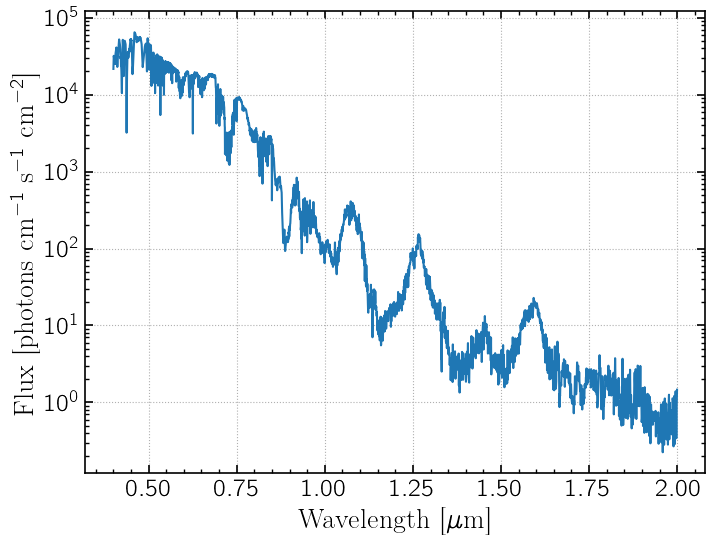

In [11]:
%matplotlib inline
plt.plot(wavelength, nphotons_per_wavelength)
plt.gca().set_yscale('log')
plt.ylabel('Flux [photons cm$^{-1}$ s$^{-1}$ cm$^{-2}$]')
plt.xlabel('Wavelength [$\mu$m]')
plt.grid(ls=':')

Text(0.5, 1.0, "Filter x Flux for r'")

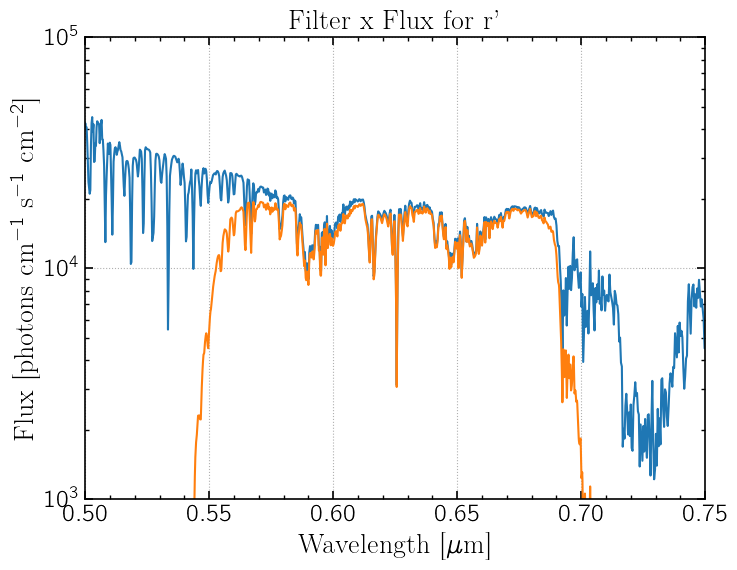

In [14]:
# Combine flux with filter curve:
i = 1
w = filters[i].wavelength*filters[i].wavelength_unit.to(u.um)
t = filters[i].transmission
# make interpolation function:
ind = np.where((wavelength > np.min(w)) & (wavelength < np.max(w)))[0]
# of spectrum wavelength and Flux in photons/cm s cm^2:
from scipy.interpolate import interp1d
f = interp1d(wavelength[ind], nphotons_per_wavelength[ind], fill_value="extrapolate")
# interpolate the filter flux onto the spectrum wavelength grid:
flux_on_filter_wavelength_grid = f(w)

# multiply flux time filter transmission
filter_times_flux = flux_on_filter_wavelength_grid * t

%matplotlib inline
plt.plot(wavelength, nphotons_per_wavelength)
plt.plot(w,filter_times_flux)
plt.gca().set_yscale('log')
plt.ylabel('Flux [photons cm$^{-1}$ s$^{-1}$ cm$^{-2}$]')
plt.xlabel('Wavelength [$\mu$m]')
plt.grid(ls=':')
plt.xlim(right=0.75, left=0.5)
plt.ylim(1e3,1e5)
plt.title("Filter x Flux for r'")

Total flux in filter:<br>
$$Total \; flux \;[\gamma \;s^{-1} cm^{-2}] = \sum(F_\lambda(\lambda) [\gamma \;cm^{-1} s^{-1} cm^{-2}] \times R(\lambda) \times \delta\lambda [cm] )$$

In [15]:
# Now sum:
#total_flux_in_filter = np.sum(flux_on_filter_wavelength_grid)
dl = (np.mean([w[j+1] - w[j] for j in range(len(w)-1)]) * u.um).to(u.cm)

total_flux_in_filter = np.sum(filter_times_flux * dl.value)
print(total_flux_in_filter*(1/(u.s*u.cm**2)))

0.21998578352333809 1 / (cm2 s)


Text(0.5, 1.0, "Filter x Flux x $\\delta\\lambda$[cm] for r'")

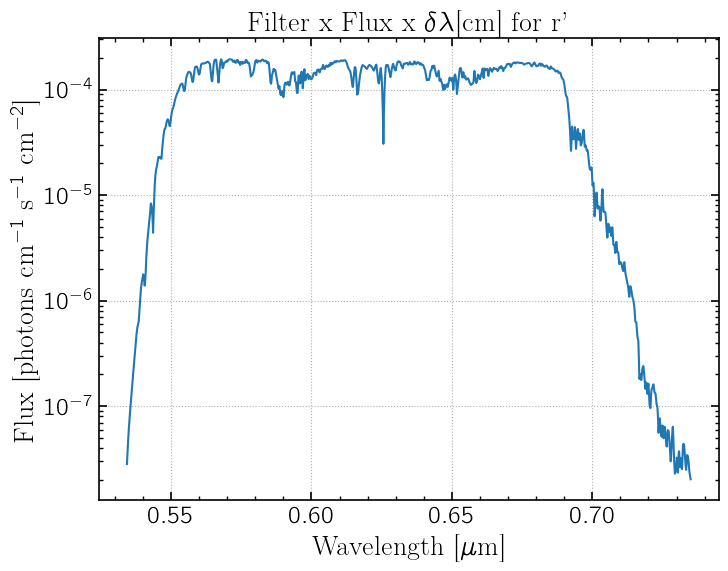

In [16]:
%matplotlib inline

%matplotlib inline
plt.plot(w, filter_times_flux * dl.value)
#plt.plot(w,filter_times_flux)
plt.gca().set_yscale('log')
plt.ylabel('Flux [photons cm$^{-1}$ s$^{-1}$ cm$^{-2}$]')
plt.xlabel('Wavelength [$\mu$m]')
plt.grid(ls=':')
#plt.xlim(right=0.6, left=0.38)
#plt.ylim(1e3,1e5)
plt.title("Filter x Flux x $\delta\lambda$[cm] for r'")

### Area for MagAO-X:<br>

$$Total \; flux \;[\gamma \;s^{-1}] = Total \; flux \;[\gamma \;s^{-1} cm^{-2}] \times area$$
Where area is the total area of the point source on the detector -> the psf core


Camera is ProEM-HS:1024BX3 https://www.princetoninstruments.com/wp-content/uploads/2020/10/ProEM-HS_1024BX3_datasheet.pdf<br>
1024 x 1024 pixels, 13 x 13 $\mu$m pixels, 13.3 x 13.3 mm imaging area<br>
plate scale is 6 mas/pixel

$$PSF \;core \;[pixels] = 1.22\frac{\lambda}{D} \times \frac{pixels}{6\; mas}$$
$$PSF \;core \;area \;[pixels] = \pi \times 0.5 PSF \;core \;[pixels]$$
$$PSF \;core \;area \;[cm^2] = PSF \;core \;area \;[pixels] \times pixel \;area \;[cm^2/pixel]$$



In [17]:
# Get physical size of each pixel:
pixel_side = 13*u.um.to(u.cm)*u.cm
pixel_area = pixel_side**2

# Get physical size of PSF core on detector:
psf_core_mas = ((filters[i].central_wavelength*filters[i].wavelength_unit.to(u.um) / 6.5) * 0.2063)*u.arcsec.to(u.mas) * 1.22
psf_core_pixels = psf_core_mas / 6
psf_core_area_pixels = (psf_core_pixels)**2 * np.pi 
psf_core_area_cm2 = psf_core_area_pixels * pixel_area

#Total flux in photons/sec:
total_flux_in_photons_sec = total_flux_in_filter * psf_core_area_cm2.value
total_flux_in_photons_sec

1.9064485714909573e-05

# ^NOPE

The area is the area of the primary - the light collecting bucket size.

# Signal:

In [69]:
def GetPhotonsPerSec(wavelength, flux, filt, distance, radius, primary_mirror_diameter,
                    return_ergs_flux_times_filter = False, Omega = None):
    ''' Given a spectrum with wavelengths in um and flux in ergs cm^-1 s^-1 cm^-2, convolve 
    with a filter transmission curve and return photon flux in photons/sec
    
    Args:
        wavelength [arr]: wavelength array in um
        flux [arr]: flux array in ergs cm^-1 s^-1 cm^-2
        filt [myastrotools filter object]: filter
        distance [astropy unit object]: distance to star with astropy unit
        radius [astropy unit object]: radius of star or planet with astropy unit
        primary_mirror_diameter [astropy unit object]: primary mirror diameter with astropy unit
        return_ergs_flux [bool]: if True, return photons/sec and the flux in ergs cm^-1 s^-1 cm^-2
                                convolved with the filter
    Returns
        astropy units object: flux in photons/sec
        
    '''
    # correct for distance:
    D = distance
    Rp = radius
    if not Omega:
        Omega = ((Rp/D).decompose())**2
    flux = flux * Omega

    # energy in ergs:
    energy_per_photon_per_wavelength = c.h.cgs * c.c.cgs / wavelength
    # Flux in photons/cm s cm^2: number of photons per area per sec per lambda:
    nphotons_per_wavelength = flux / energy_per_photon_per_wavelength
    
    # Combine flux with filter curve:
    w = filt.wavelength*filt.wavelength_unit.to(u.um)
    t = filt.transmission
    # make interpolation function:
    ind = np.where((wavelength > np.min(w)) & (wavelength < np.max(w)))[0]
    # of spectrum wavelength and Flux in photons/cm s cm^2:
    from scipy.interpolate import interp1d
    f = interp1d(wavelength[ind], nphotons_per_wavelength[ind], fill_value="extrapolate")
    # interpolate the filter flux onto the spectrum wavelength grid:
    flux_on_filter_wavelength_grid = f(w)

    # multiply flux time filter transmission
    filter_times_flux = flux_on_filter_wavelength_grid * t
    
    # Now sum:
    dl = (np.mean([w[j+1] - w[j] for j in range(len(w)-1)]) * u.um).to(u.cm)

    total_flux_in_filter = np.sum(filter_times_flux * dl.value)
    
    
    area_of_primary = np.pi * ((0.5*primary_mirror_diameter).to(u.cm))**2

    #Total flux in photons/sec:
    total_flux_in_photons_sec = total_flux_in_filter * area_of_primary.value
    
    if return_ergs_flux_times_filter:
        f = interp1d(wavelength[ind], flux[ind], fill_value="extrapolate")
        # interpolate the filter flux onto the spectrum wavelength grid:
        flux_ergs_on_filter_wavelength_grid = f(w)
        filter_times_flux_ergs = flux_ergs_on_filter_wavelength_grid * t
        
        return total_flux_in_photons_sec * (1/u.s), filter_times_flux_ergs, w
    
    return total_flux_in_photons_sec * (1/u.s)

directory = '/Volumes/Oy/Reflectx/ReflectXGasGiantModelGrid/'
directory += 'ReflectXGasGiantModelGrid-Jupiter-Tstar5000-Rstar0.8-Teq279-sep0.5-rad1.0-mass1.0-mh3-co1.5-phase45'
spec = pd.read_csv(directory+'/cloud-free-spectrum-R2000.csv', delim_whitespace=True)
wavelength = spec['wavelength [um]']
flux = spec['planet flux [ergs/cm2/s/cm]']

from myastrotools.tools import SloangFilter,SloaniFilter,SloanrFilter,SloanzFilter, NIRC2HFilter, NIRC2JFilter
filters = [SloangFilter(),SloaniFilter(),SloanrFilter(),SloanzFilter(),NIRC2JFilter(),NIRC2HFilter()]

    
distance = 10*u.pc
planet_radius = 1*u.Rjup
primary_mirror_diameter = 6.5*u.m
planet_signal = []
for filt in filters:
    planet_signal.append(GetPhotonsPerSec(wavelength, flux, filt, distance, 
                                          planet_radius, primary_mirror_diameter).value)
planet_signal = np.array(planet_signal)
planet_signal

array([4.60450428e+04, 7.34672197e+03, 2.32359984e+04, 1.15811804e+03,
       7.01974280e+01, 1.43228125e+01])

# Noise

In a single resolution element ($\lambda$/D) in a single observation:<br>
noise in the halo:
$$ \sigma_h^2 = \underbrace{I_* \Delta t}_\text{Star poisson noise} \left[\underbrace{I_c + I_{as} + I_{qs}}_\text{Poisson noise from star halo at planet location} + \underbrace{I_*[\tau_{as}(I_{as}^2 + 2[I_c I_{as} + I_{as} I_{qs}])}_\text{Atm speckles} + \underbrace{\tau_{qs}(I_{qs}^2 + 2I_c I_{qs})]}_\text{Quasistatic speckles} \right]\;\; + \underbrace{I_p \Delta t}_\text{Planet poisson noise} \;\; + \underbrace{I_{\rm{sky}}\Delta t N_{\rm{pix}}(\lambda)}_\text{Sky background poisson noise} \;\; + \underbrace{\left(RN \frac{\Delta t}{t_{\rm{exp}}}\right)^2}_\text{Read noise} \;\; + \underbrace{I_{dc}\Delta t N_{\rm{pix}}(\lambda)}_\text{dark current}
$$

where: <br>
$I_*$ is the peak star intensity without a coronagraph in photons/sec <br>
$I_c$ is the fractional contribution of intensity from residual diffraction from coronagraph, <br>
$I_{as}$ is the contribution from atmospheric speckles,<br>
$I_{qs}$ is contribution from spckles caused by instrument imperfections ("quasi-static" speckles), <br>
$\tau_{as}$ is the average lifetime of atmospheric speckles, <br>
$\tau_{qs}$ is the average lifetime of quasi-static speckles, <br>
$I_p$ is the planet intensity in photons/sec, <br>
$I_{sky}$ is the average sky background count rate, <br>
RN is the read noise, <br>
$I_{dc}$ is the dark current count rate, <br>
$\Delta t$ is the observation time,<br>
$t_{exp}$ is the exposure time of a single frame. <br>
$N_{pix}$ is the number of pixels within the area of a circle of a 1 $\lambda$/D radius, <br>
where: $A_{\rm{\lambda/D}} \rm{[mas]} = \pi r^2, r = 0.5\lambda/D,\; \lambda/D \rm{[mas]} = 0.2063 \frac{\lambda [\mu m]}{D [\rm{m}]} \times 10^{-3}$ and A$_{pix}$ = pixel side length [mas]^2, then $N_{pix} = A_{\rm{\lambda/D}} \rm{[mas]} / A_{pix} \rm{[mas]}$.
<br>
From Males et al. 2021 Eqn 7 + typical noise sources

In [21]:
planet_poisson_noise = np.sqrt(planet_signal)
planet_poisson_noise

array([380.33507372, 151.92237418, 270.18149793,  60.3186133 ,
        14.85031057,   6.70793877])

### Need Star signal

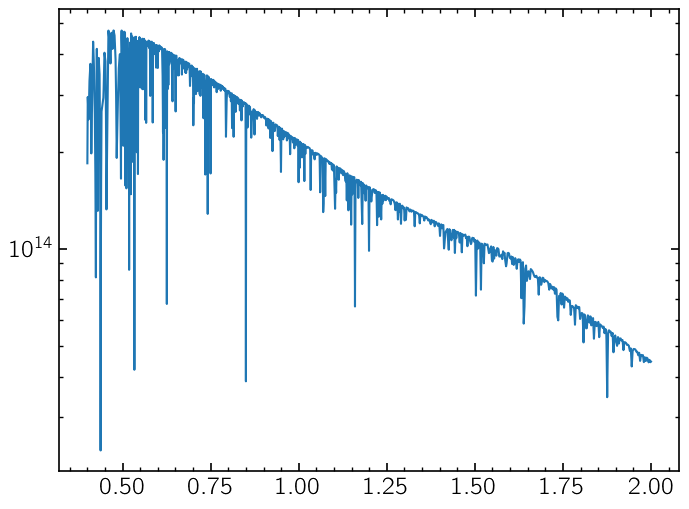

In [22]:
directory = '/Volumes/Oy/Reflectx/ReflectXGasGiantModelGrid/'
directory += 'ReflectXGasGiantModelGrid-Jupiter-Tstar5000-Rstar0.8-Teq279-sep0.5-rad1.0-mass1.0-mh3-co1.5-phase45'
star = pickle.load(open(directory+'/cloud-free-spectrum-full-output-R2000.pkl','rb'))

# pl.inputs['star']
%matplotlib inline
plt.plot(1e4/star['star wavenumber'], star['star flux'])
plt.gca().set_yscale('log')
#plt.xlim(0,2.0)

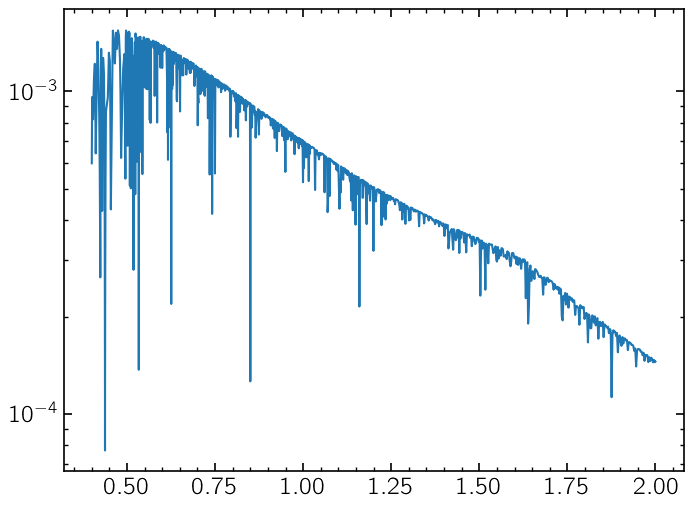

In [62]:
D = 10*u.pc.to(u.m)
Rp = 0.8*u.Rsun.to(u.m)
Omega = ((Rp/D))**2
flux = star['star flux'] * Omega
flux

%matplotlib inline
plt.plot(1e4/star['star wavenumber'], flux)
plt.gca().set_yscale('log')

In [70]:
wavelength = 1e4/star['star wavenumber']
flux = star['star flux']

from myastrotools.tools import SloangFilter,SloaniFilter,SloanrFilter,SloanzFilter, NIRC2HFilter, NIRC2JFilter
filters = [SloangFilter(),SloaniFilter(),SloanrFilter(),SloanzFilter(),NIRC2JFilter(),NIRC2HFilter()]


# Photons/sec:
distance = 10*u.pc
star_radius = 0.8*u.Rsun
primary_mirror_diameter = 6.5*u.m
star_signal = []
for filt in filters:
    star_signal.append(GetPhotonsPerSec(wavelength, flux, filt, distance, star_radius, primary_mirror_diameter).value)
star_signal = np.array(star_signal)
star_signal, planet_signal

(array([1.11072350e+13, 1.95486040e+13, 1.72133710e+13, 2.97486608e+13,
        1.66390566e+13, 1.99371042e+13]),
 array([4.60450428e+04, 7.34672197e+03, 2.32359984e+04, 1.15811804e+03,
        7.01974280e+01, 1.43228125e+01]))

### Ias

#### Get guide star magnitude

m$_{\rm{Vega}}$ = -2.5 x log$_{10} \left(\frac{F_{\lambda}(\lambda_{0})}{F_{\lambda,\rm{Vega}}(\lambda_{0})}\right)$

0.001004371205326185
flam
0.12475717809478722 1 / cm
0.001004371205326185 0.12475717809478722 1 / cm


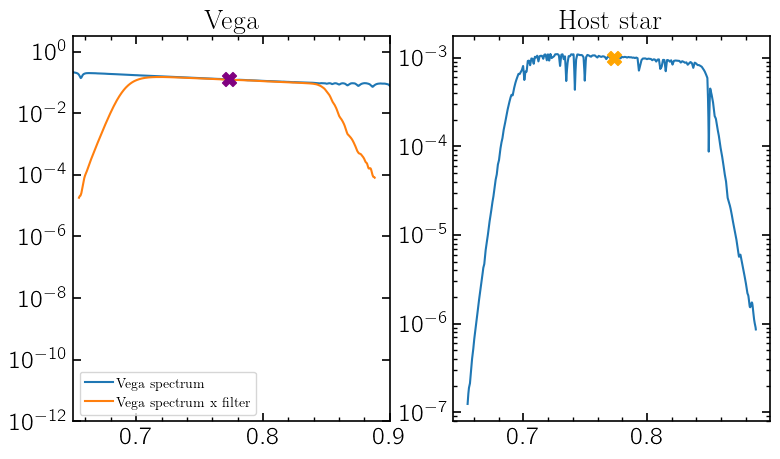

In [86]:
def GetFofLambdaNaught(wavelength,flux,filt):
    from scipy.interpolate import interp1d
    f = interp1d(wavelength,flux)
    F0 = f(filt.central_wavelength*filt.wavelength_unit.to(u.um))
    return F0


######## Host star:
wavelength = 1e4/star['star wavenumber']
flux = star['star flux']
filt = SloaniFilter()

# Get flux spectrum at 10 pc distance:
star_flux_in_phot,star_flux_in_ergs, filt_w = GetPhotonsPerSec(wavelength, flux, filt, distance, star_radius, 
                                                       primary_mirror_diameter,
                                                       return_ergs_flux_times_filter=True)

# Get F(l_0)
star_Flambda0 = GetFofLambdaNaught(filt_w, star_flux_in_ergs, filt)
sp = S.ArraySpectrum(filt_w, star_flux_in_ergs, name='MySource')
print(sp.sample(filt.central_wavelength*filt.wavelength_unit.to(u.um)))



######### Vega:
import pysynphot as S
vega = S.Vega
print(S.Vega.fluxunits.name)

filt = SloaniFilter()
vega_Flam0 = vega.sample(filt.central_wavelength*filt.wavelength_unit.to(u.AA))
print(vega_Flam0*(1/u.AA).to(1/u.cm))


plt.figure(figsize=(9,5))
plt.subplot(121)
plt.plot(vega.wave*u.AA.to(u.um), vega.flux*(1/u.AA).to(1/u.cm), label='Vega spectrum')
plt.plot(filt_w, vega_flux_in_ergs*(1/u.AA).to(1/u.cm), label='Vega spectrum x filter')
plt.scatter(filt.central_wavelength*filt.wavelength_unit.to(u.um), vega_Flambda0,
           marker='X', s=100, color='purple',zorder=10)
plt.gca().set_yscale('log')
plt.xlim(0.65, 0.9)
plt.ylim(bottom = 1e-12)
plt.title('Vega')
plt.legend()

plt.subplot(122)
plt.plot(filt_w, star_flux_in_ergs)
plt.scatter(filt.central_wavelength*filt.wavelength_unit.to(u.um), star_Flambda0,
           marker='X', s=100, color='orange',zorder=10)
plt.gca().set_yscale('log')
plt.title('Host star')
print(star_Flambda0, vega_Flambda0)

In [82]:
vega_Flambda0 = vega_Flam0*(1/u.AA).to(1/u.cm)
star_magnitude = -2.5 * np.log10(star_Flambda0/vega_Flambda0.value)
star_magnitude

available_mags = np.array(['0', '2.5', '5', '7', '9', '10', '11',
                        '11.5', '12', '12.5', '13','13.5', '14', '14.5', '15'])
available_mags = np.array([float(m) for m in available_mags])
idx = (np.abs(available_mags - star_magnitude)).argmin()
guidestarmag = str(available_mags[idx]).replace('.0','')
guidestarmag

'5'

In [101]:
def GetNoiseModelMap(guidestarmag, wfc):
    from astropy.io import fits
    IasMap = fits.getdata(f'../GMagAO-X-noise/contrast_{guidestarmag}_{wfc}.fits')
    return IasMap

def GetIasFromTable(guidestarmag, wfc, sep, pa):
    ''' For a given guide star magnitude and wfc, look up the value of the atmospheric speckle
        contribution I_as (Males et al. 2021 eqn 6) at a given separation and position angle
        
    Args:
        guidestarmag (flt or str): Guide star magnitude. Must be: ['0', '2.5', '5', '7', '9', '10', '11',
                        '11.5', '12', '12.5', '13','13.5', '14', '14.5', '15']
        wfc (str): wavefront control set up.  Either linear predictive control "lp" or simple integrator "si"
        sep (flt): separation in lambda/D
        pa (flt): position angle in degrees
    
    Returns:
        flt: value of I_as at that location
    '''
    IasMap = GetNoiseModelMap(guidestarmag, wfc)
    center = [0.5*(IasMap.shape[0]-1),0.5*(IasMap.shape[1]-1)]
    dx = sep * np.cos(np.radians(pa + 90))
    dy = sep * np.sin(np.radians(pa + 90))
    if int(np.round(center[0]+dx, decimals=0)) < 0:
        return np.nan
    try:
        return IasMap[int(np.round(center[0]+dx, decimals=0)),int(np.round(center[1]+dy,decimals=0))]
    except IndexError:
        return np.nan
    
def GetIas(guidestarmag, wfc, sep, pa, wavelength):
    '''For a given guide star magnitude, wfc, and planet-star contrast, get the SNR
        in the speckle-limited regime (Eqn 10 of Males et al. 2021)
        at a given separation and position angle.
        
    Args:
        guidestarmag (flt or str): Guide star magnitude. Must be: ['0', '2.5', '5', '7', '9', '10', '11',
                        '11.5', '12', '12.5', '13','13.5', '14', '14.5', '15']
        wfc (str): wavefront control set up.  Either linear predictive control "lp" or simple integrator "si"
        sep (flt): separation in lambda/D
        pa (flt): position angle in degrees
        Cp (flt): planet-star contrast
        deltat (flt): observation time in sec
        wavelength (astropy units object):  central wavelength of filter band
        tau_as (flt): lifetime of atmospheric speckles in sec. Default = 0.02, ave tau_as for 24.5 m telescope
                from Males et al. 2021 Fig 10
    
    Returns:
        flt: value of I_as at that location
    '''
    wavelength = wavelength.to(u.um)
    # Look up Ias from table
    Ias = GetIasFromTable(guidestarmag, wfc, sep, pa)
    # Correct for differnce in wavelength between lookup table and filter wavelength:
    Ias = Ias * (((0.8*u.um/wavelength))**2).value
    if np.isnan(Ias):
        raise Exception('Sep/PA is outside noise map boundaries')
    else:
        return Ias
        
i = 0
guidestarmag = 0
wfc = 'lp'
sep = 10 # lod
pa = 90 # deg

Ias = []
for i in range(len(filters)):
    wavelength = filters[i].central_wavelength*filters[i].wavelength_unit
    Ias.append(GetIas(guidestarmag, wfc, sep, pa, wavelength))
Ias = np.array(Ias)
Ias

array([6.38461523e-07, 2.44245090e-07, 3.72570020e-07, 1.56288315e-07,
       9.40539021e-08, 5.55708287e-08])

In [87]:
def GetSNR(Ip, Istar, Ic, Ias, Iqs, tau_as, tau_qs, deltat, RN = None, Isky = None, Idc = None, texp = None):
    signal = Ip * deltat
    photon_noise = Ic + Ias + Iqs
    atm_speckles = Istar * ( tau_as * (Ias**2 + 2*(Ic*Ias + Ias*Iqs)) )
    qs_speckles = Istar * ( tau_qs * (Iqs**2 + 2*Ic*Iqs) )
    sigma_sq_h = Istar * deltat * (photon_noise + atm_speckles + qs_speckles) + signal
    if RN is not None:
        skyanddetector = Isky*deltat + Idc*deltat + (RN * deltat/texp)**2
        noise = np.sqrt(sigma_sq_h + skyanddector)
    else:
        noise = np.sqrt(sigma_sq_h)
        
    return signal / noise


Ic = 1e-20
Iqs = 1e-20
tau_as = 0.02 # sec, from Fig 10 in Males+ 2021
tau_qs = 0.05 # I don't know a value
deltat = 100000 #s
snrs = [] 
for i in range(len(filters)):
    Ip = planet_signal[i]
    Istar = star_signal[i]
    I_as = Ias[i]
    snrs.append(GetSNR(Ip, Istar, Ic, I_as, Iqs, tau_as, tau_qs, deltat, 
                 RN = None, Isky = None, Idc = None, texp = None))
    
snrs

[14.518665610812786,
 3.4406166754462193,
 8.101621793359108,
 0.5569845554977313,
 0.10029943294244492,
 0.028906881265468063]